<a href="https://colab.research.google.com/github/GirlsWhoCode0101/data-job-recommender/blob/main/finalCodeDataJob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurations


In [ ]:
resampling = 1  # 0: no, 1: yes
add_data = 1  # 0: no, 1: yes
feature_selection_used = 0  # 0: all, 1: Cramer's V, 2: by domain knowledge
PCA_used = 0
TSNE_used = 0
LDA_used = 1  # 0: no, 1: yes
do_grid_search = 0

## Loading and Renaming

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_survey_2020_responses.csv')
df.drop_duplicates(inplace=True)
df.drop(index=0, axis=0, inplace=True)

to_be_removed_cols = ['Time from Start to Finish (seconds)', 'Q18', 'Q19', 'Q28_A', 'Q32', 'Q34_A', 'Q26_B', 'Q27_B', 'Q28_B',
           'Q29_B', 'Q30_B', 'Q31_A', 'Q31_B', 'Q32_B', 'Q33_A', 'Q33_B', 'Q34_B', 'Q35_A', 'Q35_B']

irrelevant_questions = ['Age', 'Gender', 'Country', 'Education', 'Q21', 'Q20', 'Current yearly compensation']

names_to_be_replaced = {'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Role',
                 'Q6': 'Programming Experience', 'Q7_Part_1': 'Python', 'Q7_Part_2': 'R', 'Q7_Part_3': 'SQL',
                 'Q7_Part_4': 'C', 'Q7_Part_5': 'C++',
                 'Q7_Part_6': 'Java', 'Q7_Part_7': 'Javascript', 'Q7_Part_8': 'Julia', 'Q7_Part_9': 'Swift',
                 'Q7_Part_10': 'Bash', 'Q7_Part_11': 'MATLAB used', 'Q7_Part_12': 'None pr. language',
                 'Q7_OTHER': 'Other pr.languages',
                 'Q8': 'Recommended pr. language', 'Q9_Part_1': 'JupyterLab', 'Q9_Part_2': 'RStudio',
                 'Q9_Part_3': 'Visual Studio', 'Q9_Part_4': 'Visual Studio Code', 'Q9_Part_5': 'PyCharm',
                 'Q9_Part_6': 'Spyder',
                 'Q9_Part_7': 'Notepad++', 'Q9_Part_8': 'Sublime Text', 'Q9_Part_9': 'Vim / Emacs',
                 'Q9_Part_10': 'MATLAB', 'Q9_Part_11': 'No IDE', 'Q9_OTHER': 'Other IDE',
                 'Q10_Part_1': 'Kaggle Notebooks', 'Q10_Part_2': 'Colab Notebooks', 'Q10_Part_3': 'Azure Notebooks',
                 'Q10_Part_4': 'Paperspace / Gradient', 'Q10_Part_5': 'Binder / JupyterHub', 
                 'Q10_Part_6': 'Code Ocean',
                 'Q10_Part_7': 'IBM Watson Studio', 'Q10_Part_8': 'Amazon Sagemaker Studio',
                 'Q10_Part_9': 'Amazon EMR Notebooks',
                 'Q10_Part_10': 'Google Cloud AI Platform Notebooks', 'Q10_Part_11': 'Google Cloud Datalab Notebooks',
                 'Q10_Part_12': 'Databricks Collaborative Notebooks', 'Q10_Part_13': 'No Notebook',
                 'Q10_OTHER': 'Other Notebook',
                 'Q11': 'computing platform used',
                 'Q12_Part_1': 'GPUs', 'Q12_Part_2': 'TPUs', 'Q12_Part_3': 'No HW', 'Q12_OTHER': 'other HW',
                 'Q13': 'usage TPU',
                 'Q14_Part_1': 'Matplotlib', 'Q14_Part_2': 'Seaborn', 'Q14_Part_3': 'Plotly / Plotly Express',
                 'Q14_Part_4': 'Ggplot / ggplot2', 'Q14_Part_5': 'Shiny', 'Q14_Part_6': 'D3js', 'Q14_Part_7': 'Altair',
                 'Q14_Part_8': 'Bokeh', 'Q14_Part_9': 'Geoplotlib', 'Q14_Part_10': 'Leaflet / Folium',
                 'Q14_Part_11': 'No libs',
                 'Q14_OTHER': 'Other libs', 'Q15': 'ML experience', 'Q16_Part_1': 'Scikit-learn',
                 'Q16_Part_2': 'Decision Trees or Random Forests',
                 'Q16_Part_3': 'Keras', 'Q16_Part_4': 'PyTorch', 'Q16_Part_5': 'Fast.ai', 'Q16_Part_6': 'MXNet',
                 'Q16_Part_7': 'Xgboost',
                 'Q16_Part_8': 'LightGBM', 'Q16_Part_9': 'CatBoost', 'Q16_Part_10': 'Prophet', 'Q16_Part_11': 'H2O3',
                 'Q16_Part_12': 'Caret', 'Q16_Part_13': 'Tidymodels', 'Q16_Part_14': 'JAX',
                 'Q16_Part_15': 'No ML framework used',
                 'Q16_OTHER': 'Other ML framework used', 'Q17_Part_1': 'Linear or Logistic Regression',
                 'Q17_Part_2': 'TensorFlow',
                 'Q17_Part_3': 'Gradient Boosting Machines', 'Q17_Part_4': 'Bayesian Approaches',
                 'Q17_Part_5': 'Evolutionary Approaches',
                 'Q17_Part_6': 'Dense Neural Networks', 'Q17_Part_7': 'Convolutional Neural Networks',
                 'Q17_Part_8': 'Generative Adversarial Networks', 'Q17_Part_9': 'Recurrent Neural Networks',
                 'Q17_Part_10': 'Transformer Networks',
                 'Q17_Part_11': 'No ML algorithm', 'Q17_OTHER': 'Other ML algorithm', 
                 'Q24':'Current yearly compensation',
                 'Q25': 'Team spent on ML', 'Q26_A_Part_1': 'Amazon Web Services',
                 'Q26_A_Part_2': 'Microsoft Azure', 'Q26_A_Part_3': 'Google Cloud Platform',
                 'Q26_A_Part_11': 'No cloud pl. used',
                 'Q27_A_Part_1': 'Amazon EC2', 'Q27_A_Part_2': 'AWS Lambda',
                 'Q27_A_Part_3': 'Amazon Elastic Container Service',
                 'Q27_A_Part_4': 'Azure Cloud Services', 'Q27_A_Part_5': 'Microsoft Azure Container Instances',
                 'Q27_A_Part_6': 'Azure Functions', 'Q27_A_Part_7': 'Google Cloud Compute Engine',
                 'Q27_A_Part_8': 'Google Cloud Functions',
                 'Q27_A_Part_9': 'Google Cloud Run', 'Q27_A_Part_10': 'Google Cloud App Engine',
                 'Q27_A_Part_11': 'No cloud c. platform', 'Q27_A_OTHER': 'Other cloud c. platform',
                 'Q29_A_Part_1': 'MySQL', 'Q29_A_Part_2': 'PostgresSQL', 'Q29_A_Part_3': 'SQLite',
                 'Q29_A_Part_5': 'MongoDB',
                 'Q29_A_Part_8': 'Microsoft SQL Server', 'Q29_A_Part_17': 'No big data', 'Q30': 'Big Data Products',
                 'Q38': 'Primary Visualization tool'}

df.rename(names_to_be_replaced, axis=1, inplace=True)

print('shape: ', df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-b7f916cda9a6>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_survey_2020_responses.csv')


shape:  (20022, 355)


## Visualizations and insigths

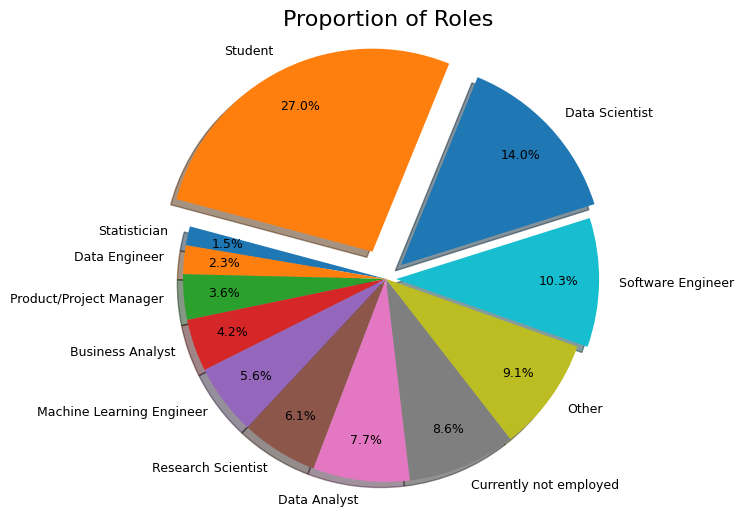

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set_style("dark")

df_roles = df.groupby('Role').agg({'Role': 'count'})
df_roles = df_roles.rename({'Role': 'count_of_roles'}, axis=1)
df_roles.sort_values(by='count_of_roles', ascending=True, inplace=True)
df_roles.drop(index=df_roles.index[0], axis=0, inplace=True)

plt.figure(figsize=(6, 6))
explode = np.zeros(len(df_roles)-3).tolist()
explode.extend([0.05,0.1,0.15])
plt.pie(df_roles['count_of_roles'], labels=df_roles.index, explode=explode, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        shadow=True, startangle=165, textprops=dict(color="black", fontsize='9'));
plt.axis('equal')
plt.title('Proportion of Roles',fontsize=16)
plt.savefig('Pie_proportion_of_roles.png', bbox_inches='tight')

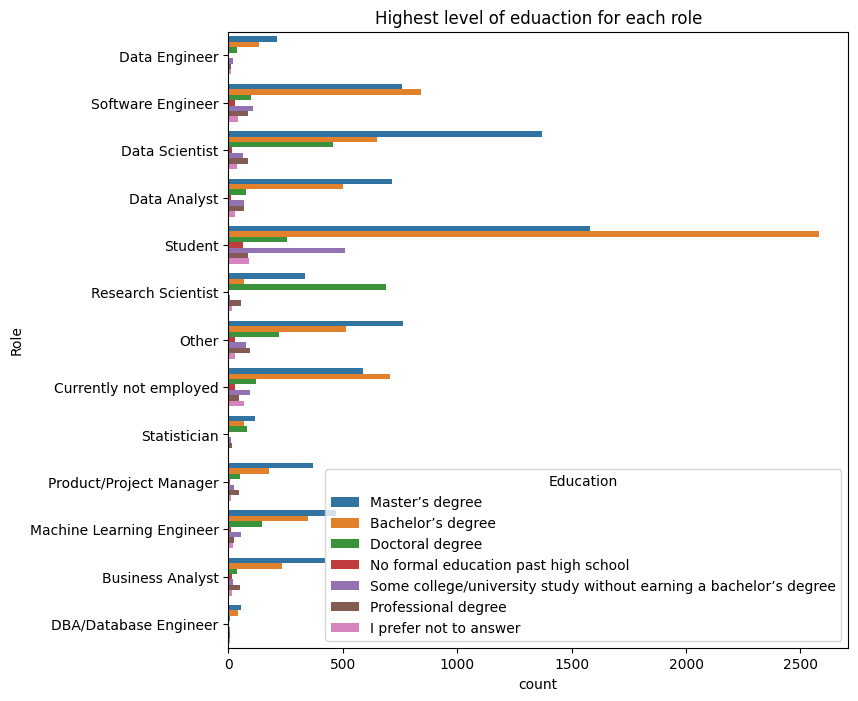

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Role', data=df.drop(index=df.index[0], axis=0), hue='Education');
plt.title('Highest level of eduaction for each role');
plt.savefig('Level_of_eduaction_for_each_role.png', bbox_inches='tight')

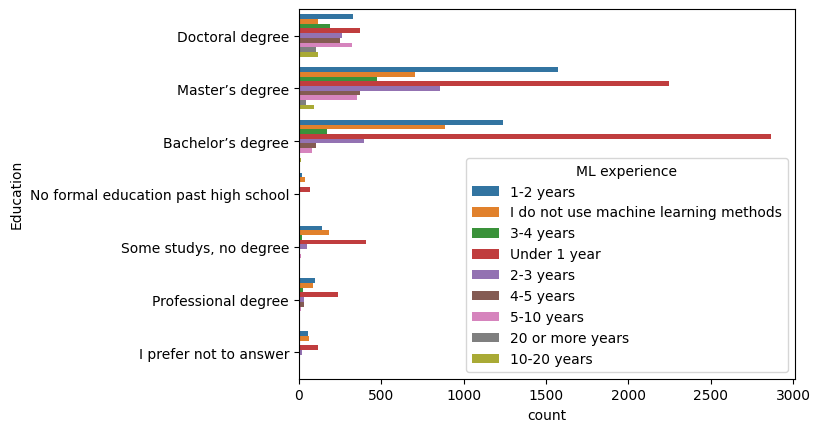

In [ ]:
df = df.replace({'Some college/university study without earning a bachelor’s degree': 'Some studys, no degree'})
sns.countplot(data=df, y='Education', hue='ML experience')
plt.show()

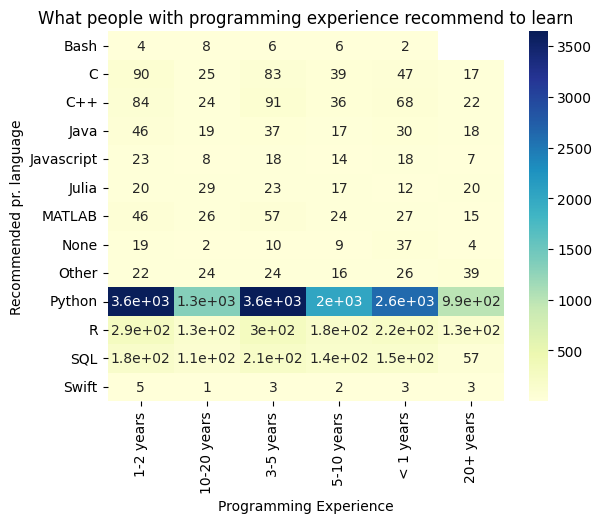

In [ ]:
counts = df.groupby(['Recommended pr. language', 'Programming Experience']).size().unstack()
sns.heatmap(counts, annot=True, cmap='YlGnBu')
plt.title('What people with programming experience recommend to learn')
plt.show()

## Preprocessing

In [ ]:
import numpy as np

for col in to_be_removed_cols:
    df_q = df.apply(lambda t: t.name.startswith(col))
    for index in range(df.shape[1]):
        if df_q[index]:
            df.drop(df_q.index[index], axis=1, inplace=True)

df.drop(irrelevant_questions, axis=1, inplace=True)
df = df[df.Role.isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst'])]
df.reset_index(drop=True, inplace=True)

df['computing platform used'].replace({'A personal computer or laptop': 'pc_or_laptop',
                                       'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)': 'cloud_comp_platform',
                                      'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)': 'deep_learning_ws'},
                                      inplace=True)

# from https://towardsdatascience.com/most-in-demand-tech-skills-for-data-engineers-58f4c1ca25ab
# https://www.iibauk.org/documents/survey/basurvey2018.pdf
def add_data(data, column_name, percentage, Role):
    data[column_name] = 0
    data_engineer_rows = data[data['Role'] == Role]
    num_ones = int(len(data_engineer_rows) * percentage)
    random_indices = np.random.choice(data_engineer_rows.index, size=num_ones, replace=False)
    data.loc[random_indices, column_name] = 1

if add_data:  
  add_data(df, column_name='kafka', percentage=0.26, Role='Data Engineer')
  add_data(df, column_name='spark', percentage=0.5, Role='Data Engineer')
  add_data(df, column_name='hadoop', percentage=0.42, Role='Data Engineer')
  add_data(df, column_name=' Requirements Analysis', percentage=0.93, Role='Business Analyst')

print('shape: ', df.shape)


shape:  (6468, 181)


<ipython-input-7-1cdea4fbe44b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['computing platform used'].replace({'A personal computer or laptop': 'pc_or_laptop',
<ipython-input-7-1cdea4fbe44b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = 0


## Feature selection by Cramer's V

In [ ]:
if feature_selection_used == 1:

  import scipy.stats as stats
  import numpy as np 
  from scipy.stats import chi2_contingency

  categorical = ['Recommended pr. language', 'Programming Experience', 
                'ML experience', 'Team spent on ML']

  # replace missing values
  df_forFeatSelection = df[df.Role.isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst'])]

  modes = df_forFeatSelection[categorical].apply(lambda c: c.mode()[0])

  for c in categorical:
      df_forFeatSelection[c].fillna(modes[c], inplace=True)
      
  df_forFeatSelection.fillna(0, inplace=True)
  target_variable = 'Role'
  feature_associations = {}
  features_cramersv = []

  for feature in df.columns:
      if feature != target_variable:
          contingency_table = pd.crosstab(df_forFeatSelection[feature], df_forFeatSelection[target_variable])
          
          # Perform chi-square test and calculate Cramér's V
          chi2, _, _, _ = chi2_contingency(contingency_table)
          n = contingency_table.sum().sum()
          phi2 = chi2 / n
          r, k = contingency_table.shape
          phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
          rcorr = r - ((r - 1) ** 2) / (n - 1)
          kcorr = k - ((k - 1) ** 2) / (n - 1)
          cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
          
          feature_associations[feature] = cramers_v

  # Sort the features based on their associations with the target variable
  sorted_features = sorted(feature_associations, key=feature_associations.get, reverse=True)

  for feature in sorted_features:
      if feature_associations[feature] > 0.2:
          features_cramersv.append(feature)
          # print(feature, ':', feature_associations[feature])


## Feature selection by domain knowledge

In [ ]:
if feature_selection_used == 2:
  features_to_be_dropped = ['Recommended pr. language', 'JupyterLab', 'RStudio',
                 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder',
                 'Notepad++', 'Sublime Text', 'Vim / Emacs', 'MATLAB', 'No IDE', 
                 'Other IDE', 'Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks',
                 'Paperspace / Gradient', 'Binder / JupyterHub', 
                 'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio',
                 'Amazon EMR Notebooks', 'Google Cloud AI Platform Notebooks', 
                 'Google Cloud Datalab Notebooks', 'Databricks Collaborative Notebooks', 
                 'No Notebook', 'Other Notebook', 'computing platform used',
                 'GPUs', 'TPUs', 'No HW', 'other HW',
                 'usage TPU', 'Team spent on ML', 'Matplotlib', 'Seaborn', 
                 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3js',
                 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'No libs',
                 'Other libs', 'Q22',
                 'Q33_A', 'Q35_A', 'Q36', 'Q37', 'Q39']

  for col in features_to_be_dropped:
    df_q = df.apply(lambda t: t.name.startswith(col))
    for index in range(df.shape[1]):
        if df_q[index]:
            df.drop(df_q.index[index], axis=1, inplace=True)

# Train, Test, Split

In [ ]:
from sklearn.model_selection import train_test_split

target = df.Role

if feature_selection_used == 0 or feature_selection_used == 2:
  features = df.drop('Role', axis=1)
elif feature_selection_used == 1:
  features_cramersv.append('Big Data Products')
  features_cramersv.append('Primary Visualization tool')
  features = df[features_cramersv]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
def replace_string(string):
    if isinstance(string, str):
        return 1
    else: 
        return 0

if feature_selection_used == 0: 
  cat_binary = ['Python', 'R', 'SQL', 'C', 'C++', 'Java',
       'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB used',
       'None pr. language', 'Other pr.languages',
       'JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code',
       'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim / Emacs',
       'MATLAB', 'No IDE', 'Other IDE', 'Kaggle Notebooks', 'Colab Notebooks',
       'Azure Notebooks', 'Paperspace / Gradient', 'Binder / JupyterHub',
       'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio',
             'Amazon EMR Notebooks', 'Google Cloud AI Platform Notebooks',
       'Google Cloud Datalab Notebooks', 'Databricks Collaborative Notebooks',
       'No Notebook', 'Other Notebook', 'GPUs',
       'TPUs', 'No HW', 'other HW', 'Matplotlib', 'Seaborn',
       'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3js',
       'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'No libs',
       'Other libs', 'Scikit-learn',
       'Decision Trees or Random Forests', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O3', 'Caret',
       'Tidymodels', 'JAX', 'No ML framework used', 'Other ML framework used',
        'Linear or Logistic Regression', 
        'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Evolutionary Approaches', 'Dense Neural Networks',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks', 'Transformer Networks', 'No ML algorithm',
       'Other ML algorithm', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7',
       'Q23_OTHER',
       'Amazon Web Services', 'Microsoft Azure', 'Google Cloud Platform',
       'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7',
       'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'No cloud pl. used',
       'Q26_A_OTHER', 'Amazon EC2', 'AWS Lambda',
       'Amazon Elastic Container Service', 'Azure Cloud Services',
       'Microsoft Azure Container Instances', 'Azure Functions',
       'Google Cloud Compute Engine', 'Google Cloud Functions',
       'Google Cloud Run', 'Google Cloud App Engine', 'No cloud c. platform',
       'Other cloud c. platform', 'MySQL', 'PostgresSQL', 'SQLite', 'Q29_A_Part_4', 
        'MongoDB', 'Q29_A_Part_6', 'Q29_A_Part_7',
       'Microsoft SQL Server', 'Q29_A_Part_9', 'Q29_A_Part_10',
       'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14',
       'Q29_A_Part_15', 'Q29_A_Part_16', 'No big data', 'Q29_A_OTHER',
       'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3',
       'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8',
       'Q36_Part_9', 'Q36_OTHER', 'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3',
       'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8',
       'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER',
       'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5',
       'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10',
       'Q39_Part_11', 'Q39_OTHER']
elif feature_selection_used == 1:
  cat_binary = ['Q23_Part_3',
       'Convolutional Neural Networks', 'Q23_Part_5',
       'Gradient Boosting Machines', 'Q23_Part_4', 'Keras', 'Python',
       'Scikit-learn', 'GPUs', 'Dense Neural Networks',
       'Decision Trees or Random Forests', 'Xgboost',
       'Recurrent Neural Networks', 'TensorFlow', 'Matplotlib', 'Q23_Part_1',
       'PyTorch', 'Q23_Part_6', 'R', 'SQL',
       'Transformer Networks', 'LightGBM', 'Linear or Logistic Regression']
elif feature_selection_used == 2:
  cat_binary = ['Python', 'R', 'SQL', 'C', 'C++', 'Java',
       'Javascript', 'Julia', 'Swift', 'Bash', 'None pr. language',
       'Other pr.languages', 'ML experience', 'Scikit-learn',
       'Decision Trees or Random Forests', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O3', 'Caret',
       'Tidymodels', 'JAX', 'No ML framework used', 'Other ML framework used',
       'Linear or Logistic Regression', 'TensorFlow',
       'Gradient Boosting Machines', 'Bayesian Approaches',
       'Evolutionary Approaches', 'Dense Neural Networks',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks', 'Transformer Networks',
       'No ML algorithm', 'Other ML algorithm', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7',
       'Q23_OTHER', 'Amazon Web Services', 'Microsoft Azure',
       'Google Cloud Platform', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6',
       'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10',
       'No cloud pl. used', 'Q26_A_OTHER', 'Amazon EC2', 'AWS Lambda',
       'Amazon Elastic Container Service', 'Azure Cloud Services',
       'Microsoft Azure Container Instances', 'Azure Functions',
       'Google Cloud Compute Engine', 'Google Cloud Functions',
       'Google Cloud Run', 'Google Cloud App Engine', 'No cloud c. platform',
       'Other cloud c. platform', 'MySQL', 'PostgresSQL', 'SQLite',
       'Q29_A_Part_4', 'MongoDB', 'Q29_A_Part_6', 'Q29_A_Part_7', 
       'Microsoft SQL Server', 'Q29_A_Part_9',
       'Q29_A_Part_10', 'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13',
       'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'No big data',
       'Q29_A_OTHER']

for col in cat_binary:
    X_train[col] = X_train[col].apply(replace_string)
    X_test[col] = X_test[col].apply(replace_string)

len(cat_binary)

167

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

if feature_selection_used == 1:
  cat = ['ML experience', 'Big Data Products', 'Primary Visualization tool']
elif feature_selection_used == 0:
  cat = ['Recommended pr. language', 'Programming Experience', 'ML experience',
       'Team spent on ML', 'computing platform used', 'usage TPU',
       'Big Data Products', 'Primary Visualization tool', 'Q22']
elif feature_selection_used == 2:
  cat = ['ML experience', 'Programming Experience', 'Big Data Products', 'Primary Visualization tool']

X_train[cat] = imputer.fit_transform(X_train[cat])
X_test[cat] = imputer.transform(X_test[cat])

experience_mapping = {
    'Under 1 year': 0,
    '1-2 years': 1,
    '2-3 years': 2,
    '3-4 years': 3,
    '4-5 years': 4,
    '5-10 years': 5,
    '10-20 years': 6,
    '20 or more years': 7,
    'I do not use machine learning methods': -1
}

X_train['ML experience'] = X_train['ML experience'].apply(lambda exp: experience_mapping.get(exp, -999))
X_test['ML experience'] = X_test['ML experience'].apply(lambda exp: experience_mapping.get(exp, -999))

if feature_selection_used == 0 or feature_selection_used == 2:
  experience_mapping2 = {
      '< 1 years': 0,
      '1-2 years': 0,
      '3-5 years': 0,
      '5-10 years': 1,
      '10-20 years': 1,
      '20+ years': 2,
      'I have never written code': -1,  
  }

  X_train['Programming Experience'] = X_train['Programming Experience'].apply(lambda exp: experience_mapping2.get(exp, -999))
  X_test['Programming Experience'] = X_test['Programming Experience'].apply(lambda exp: experience_mapping2.get(exp, -999))

if feature_selection_used == 0:
  mapping3 = {
      '$0 ($USD)': 0,
      '$1-$99': 0,
      '$100-$999': 1,
      '$1000-$9,999': 1,
      '$10,000-$99,999': 2,
      '$100,000 or more ($USD)': 2
  }
    
  X_train['Team spent on ML'] = X_train['Team spent on ML'].apply(lambda exp: mapping3.get(exp, -999))
  X_test['Team spent on ML'] = X_test['Team spent on ML'].apply(lambda exp: mapping3.get(exp, -999))

  cat = ['Recommended pr. language', 'computing platform used', 'usage TPU',
        'Big Data Products', 'Primary Visualization tool', 'Q22']

  X_train_binary = X_train.drop(cat, axis=1)
  X_test_binary = X_test.drop(cat, axis=1)

if feature_selection_used != 0:
  cat = ['Big Data Products', 'Primary Visualization tool']

  X_train_binary = X_train.drop(cat, axis=1)
  X_test_binary = X_test.drop(cat, axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
  
one = OneHotEncoder(drop='first', sparse=False)

for col in cat:
    X_train[col] = X_train[col].map(str)
    X_test[col] = X_test[col].map(str)

# apply encoding to categorical non-order variables
X_train_cat = one.fit_transform(X_train[cat])
X_test_cat = one.transform(X_test[cat])
feature_names = one.get_feature_names_out(cat)
X_train_cat = pd.DataFrame(X_train_cat, columns=feature_names)
X_test_cat = pd.DataFrame(X_test_cat, columns=feature_names)

# reset index
X_train_binary = X_train_binary.reset_index(drop=True)
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_binary = X_test_binary.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

X_train_encoded = pd.concat([X_train_binary, X_train_cat], axis=1)
X_test_encoded = pd.concat([X_test_binary, X_test_cat], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_encoded.head()

,Programming Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,...,"Primary Visualization tool_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Primary Visualization tool_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Primary Visualization tool_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Primary Visualization tool_Local development environments (RStudio, JupyterLab, etc.)",Primary Visualization tool_Other,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production)
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,1,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train.map(str))
y_test = le.transform(y_test.map(str))


# Resampling

In [ ]:
if resampling:

  from imblearn.over_sampling import RandomOverSampler
  from imblearn.over_sampling import SMOTE, ADASYN

  rOs = RandomOverSampler()
  smote = SMOTE()
  adasyn = ADASYN()

  X_ro, y_ro = rOs.fit_resample(X_train_encoded, y_train)
  print('Oversampled sample classes :', dict(pd.Series(y_ro).value_counts(normalize = True)))
  X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_encoded, y_train)
  X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_encoded, y_train)


Oversampled sample classes : {2: 0.2, 0: 0.2, 3: 0.2, 1: 0.2, 4: 0.2}


# Dimension reduction methods

In [ ]:
if PCA_used:
  import seaborn as sns
  from sklearn.decomposition import PCA
  from matplotlib import pyplot as plt
  from sklearn.preprocessing import StandardScaler

  # Standardize the features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled_adasyn)

  pca=PCA()
  X_PCA = pca.fit_transform(X_resampled_adasyn)

  pca_mat = pd.DataFrame({'ax1': X_PCA[:, 0], 'ax2': X_PCA[:, 1], 'target': y_resampled_adasyn})
  sns.scatterplot(x='ax1', y='ax2', hue='target', data=pca_mat)
  plt.title('Principal component analysis')

In [ ]:
if TSNE_used:
  # PCA plus TSNE
  import seaborn as sns
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  X_TSNE_ACP = tsne.fit_transform(X_PCA)

  pca_mat = pd.DataFrame({'ax1': X_TSNE_ACP[:, 0], 'ax2': X_TSNE_ACP[:, 1], 'target': y_resampled_adasyn})
  sns.scatterplot(x='ax1', y='ax2', hue='target', data=pca_mat);
  plt.title('PCA plus TSNE')

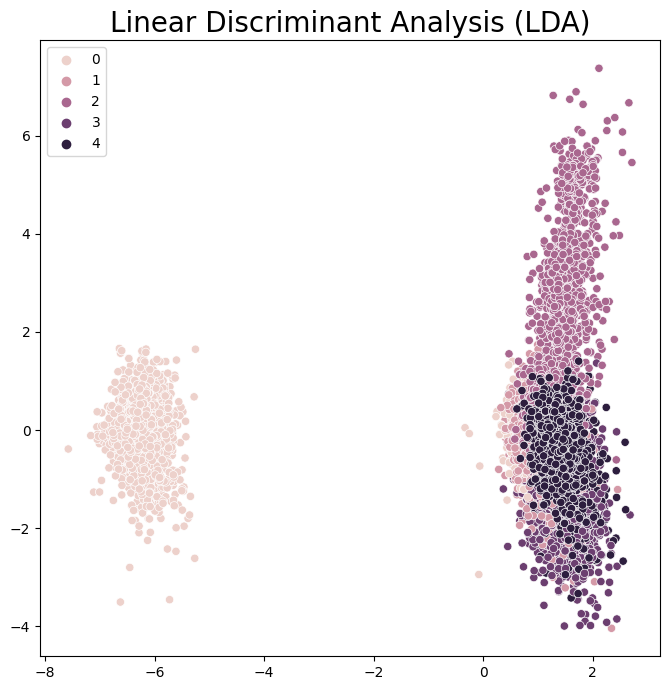

In [ ]:
if LDA_used:
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  from matplotlib import pyplot as plt
  import seaborn as sns

  lda = LDA()

  if resampling:
    X_LDA = lda.fit_transform(X_resampled_adasyn, y_resampled_adasyn)
    X_test_adasyn, y_test_adasyn = adasyn.fit_resample(X_test_encoded, y_test)
    X_LDA_test = lda.transform(X_test_adasyn)
    y_train = y_resampled_adasyn
  else:
    X_LDA = lda.fit_transform(X_train_encoded, y_train)
    X_LDA_test = lda.transform(X_test_encoded)

  plt.figure(figsize=(8,8))
  sns.scatterplot(x=X_LDA[:,0], y=X_LDA[:,1], hue=y_train)
  plt.title("Linear Discriminant Analysis (LDA)", fontsize=20)
  plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

if LDA_used == 1:
  X_train = X_LDA
  X_test = X_LDA_test
else:
  X_train = X_train_encoded
  X_test = X_test_encoded

if resampling:
  y_train = y_resampled_adasyn
  y_test = y_test_adasyn
  

cl2 = DecisionTreeClassifier()
cl2.fit(X_train, y_train)
print("Accuracy score of the Decision Tree Model : ",
      cl2.score(X_test, y_test))
y_pred = cl2.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

cl3 = RandomForestClassifier()
cl3.fit(X_train, y_train)
print("Accuracy score of the Random Forest Model : ",
      cl3.score(X_test, y_test))
y_pred = cl3.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the gradient boost model:", accuracy)

svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVC model:", accuracy)


#!pip install xgboost
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                           max_depth=3, reg_lambda=0, scale_pos_weight=1, subsample=0.8)
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost model:", accuracy)


Accuracy score of the Decision Tree Model :  0.617439120188531


Prediction,0,1,2,3,4
True,,,,,
0,461,26,12,6,9
1,33,245,70,109,74
2,3,41,376,29,52
3,4,118,19,246,127
4,9,90,45,98,244


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       514
           1       0.47      0.46      0.47       531
           2       0.72      0.75      0.74       501
           3       0.50      0.48      0.49       514
           4       0.48      0.50      0.49       486

    accuracy                           0.62      2546
   macro avg       0.62      0.62      0.62      2546
weighted avg       0.62      0.62      0.62      2546

Accuracy score of the Random Forest Model :  0.6759622937941869


Prediction,0,1,2,3,4
True,,,,,
0,455,40,9,5,5
1,9,307,61,92,62
2,0,47,384,22,48
3,2,98,15,307,92
4,1,65,53,99,268


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       514
           1       0.55      0.58      0.56       531
           2       0.74      0.77      0.75       501
           3       0.58      0.60      0.59       514
           4       0.56      0.55      0.56       486

    accuracy                           0.68      2546
   macro avg       0.68      0.68      0.68      2546
weighted avg       0.68      0.68      0.68      2546



Prediction,0,1,2,3,4
True,,,,,
0,455,34,14,4,7
1,10,311,72,84,54
2,1,46,390,14,50
3,3,98,19,302,92
4,3,58,62,90,273


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       514
           1       0.57      0.59      0.58       531
           2       0.70      0.78      0.74       501
           3       0.61      0.59      0.60       514
           4       0.57      0.56      0.57       486

    accuracy                           0.68      2546
   macro avg       0.68      0.68      0.68      2546
weighted avg       0.68      0.68      0.68      2546

Accuracy of the gradient boost model: 0.6798900235663786


Prediction,0,1,2,3,4
True,,,,,
0,451,39,11,6,7
1,0,337,52,70,72
2,1,37,394,16,53
3,2,94,17,311,90
4,1,52,50,85,298


              precision    recall  f1-score   support

           0       0.99      0.88      0.93       514
           1       0.60      0.63      0.62       531
           2       0.75      0.79      0.77       501
           3       0.64      0.61      0.62       514
           4       0.57      0.61      0.59       486

    accuracy                           0.70      2546
   macro avg       0.71      0.70      0.71      2546
weighted avg       0.71      0.70      0.71      2546

Accuracy of the SVC model: 0.7034564021995287
[11:49:37] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



Prediction,0,1,2,3,4
True,,,,,
0,455,34,14,4,7
1,5,321,65,72,68
2,1,40,393,15,52
3,2,89,19,313,91
4,1,50,62,90,283


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       514
           1       0.60      0.60      0.60       531
           2       0.71      0.78      0.75       501
           3       0.63      0.61      0.62       514
           4       0.56      0.58      0.57       486

    accuracy                           0.69      2546
   macro avg       0.70      0.69      0.69      2546
weighted avg       0.70      0.69      0.70      2546

Accuracy of the XGBoost model: 0.6932443047918303


# XGBoost Grid Search

In [ ]:

if do_grid_search:
  param_grid = {
      "max_depth": [3, 4, 5, 7],
      "learning_rate": [0.1, 0.01, 0.05],
      "gamma": [0, 0.25, 1],
      "reg_lambda": [0, 1, 10],
      "scale_pos_weight": [1, 3, 5],
      "subsample": [0.8],
      "colsample_bytree": [0.5],
  }

  from sklearn.model_selection import GridSearchCV

  xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
  grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="roc_auc")
  _ = grid_cv.fit(X_train, y_train)
  best_params = grid_cv.best_params_
  best_estimator = grid_cv.best_estimator_
  print("Best Parameters:", grid_cv.best_params_)
  print("Best Score:", grid_cv.best_score_)

# SVC Grid Search

In [ ]:
if do_grid_search:
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics import classification_report
  from sklearn.svm import SVC

  classifier = SVC()

  param_grid = {
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf'],
      'gamma': [0.1, 0.01, 0.001]
      #'class_weight': []
  }

  grid_search = GridSearchCV(classifier, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_estimator = grid_search.best_estimator_
  print("Best Parameters:", grid_search.best_params_)
  print("Best Score:", grid_search.best_score_)

  y_pred = best_estimator.predict(X_test)
  print(classification_report(y_test, y_pred))